#Лабораторная работа №2: Визуализация данных
6132 Макарова Мария Константиновна
Датасет: https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs?resource=download&select=spotify_songs.csv
Содержание датасета представляет собой информацию о песнях, собранную из Spotify API. В такую информацию входят названия треков, исполнителей, альбомов и др., а также такие характеристики композиций, представленные в виде числовых значений, как танцевальность, тональность, темп и др.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from ipywidgets import interact
import ipywidgets as widgets
import plotly.express as px
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import plotly.graph_objects as go
from plotly.subplots import make_subplots

1. Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п. Также можно сконвертировать в DataFrame любой из встроенных датасетов sklearn

In [45]:
data = pd.read_csv('spotify_songs.csv') #считываем с помощью метода read_csv и помещяем данные в data

2. Привести описание датасета.

In [46]:
description_list = [
    "Уникальный идентификатор песни",
    "Название песни",
    "Исполнитель песни",
    "Популярность песни (0-100), где выше — лучше",
    "Уникальный идентификатор альбома",
    "Название альбома песни",
    "Дата выпуска альбома",
    "Название плейлиста",
    "Идентификатор плейлиста",
    "Жанр плейлиста",
    "Поджанр плейлиста",
    "Танцевальность описывает, насколько трек подходит для танцев, на основе сочетания музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность. Значение 0,0 наименее танцевально, а 1,0 наиболее танцевально",
    "Энергия — это мера от 0,0 до 1,0, которая представляет собой перцептивную меру интенсивности и активности. Перцептивные характеристики, влияющие на этот атрибут, включают динамический диапазон, воспринимаемую громкость, тембр, скорость начала и общую энтропию.",
    "Оценочная общая тональность трека. Целые числа сопоставляются с тонами с использованием стандартной нотации класса высоты тона",
    "Общая громкость трека в децибелах (дБ)",
    "Режим указывает модальность (мажорную или минорную) трека, тип шкалы, из которой выводится его мелодическое содержание. Major представлен 1, а minor — 0",
    "Speechiness определяет наличие произнесенных слов в треке. Чем более запись похожа на речь (например, ток-шоу, аудиокнига, поэзия), тем ближе к 1,0 значение атрибута. Значения выше 0,66 описывают треки, которые, вероятно, полностью состоят из произнесенных слов. Значения между 0,33 и 0,66 описывают треки, которые могут содержать как музыку, так и речь, либо в разделах, либо наслоенными, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки",
    "Мера достоверности от 0,0 до 1,0 того, является ли трек акустическим. 1,0 представляет высокую достоверность того, что трек акустический",
    "Предсказывает, содержит ли трек вокальные данные. Звуки «ух» и «аах» в этом контексте рассматриваются как инструментальные. Треки рэпа или произнесенных слов явно «вокальные». Чем ближе значение инструментальности к 1,0, тем больше вероятность, что трек не содержит вокального контента. Значения выше 0,5 предназначены для представления инструментальных треков, но уверенность тем выше, чем ближе значение к 1,0",
    "Определяет присутствие аудитории в записи. Более высокие значения liveness представляют повышенную вероятность того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек является живым",
    "Мера от 0,0 до 1,0, описывающая музыкальную позитивность, передаваемую треком",
    "Общий предполагаемый темп трека в ударах в минуту (BPM)",
    "Длительность песни в миллисекундах"
]

dtypes_column = data.dtypes
df_info = pd.DataFrame({'Тип': dtypes_column, 'Описание': description_list})
pd.set_option('display.max_colwidth', None)
df_info

,Тип,Описание
track_id,object,Уникальный идентификатор песни
track_name,object,Название песни
track_artist,object,Исполнитель песни
track_popularity,int64,"Популярность песни (0-100), где выше — лучше"
track_album_id,object,Уникальный идентификатор альбома
track_album_name,object,Название альбома песни
track_album_release_date,object,Дата выпуска альбома
playlist_name,object,Название плейлиста
playlist_id,object,Идентификатор плейлиста
playlist_genre,object,Жанр плейлиста


3. matplotlib:

Построить несколько графиков разного вида с использованием matplotlib.  
Построить несколько суб-графиков на одном графике используя .subplot.  
Построить интерактивный график со слайдером.   

*   Графики должны быть разных видов.
*   Хотя бы в одном графике необходимо подписать оси.

*   Во всех графиках необходимо указать название.

*   Необязательно строить сложный и перегруженный информацией интерактивный график, достаточно одного-двух числовых признаков в разрезе другого признака, как минимум добавить слайдер (ползунок). Наличие других графических элементов управления (кнопки и т.п.) - опционально.



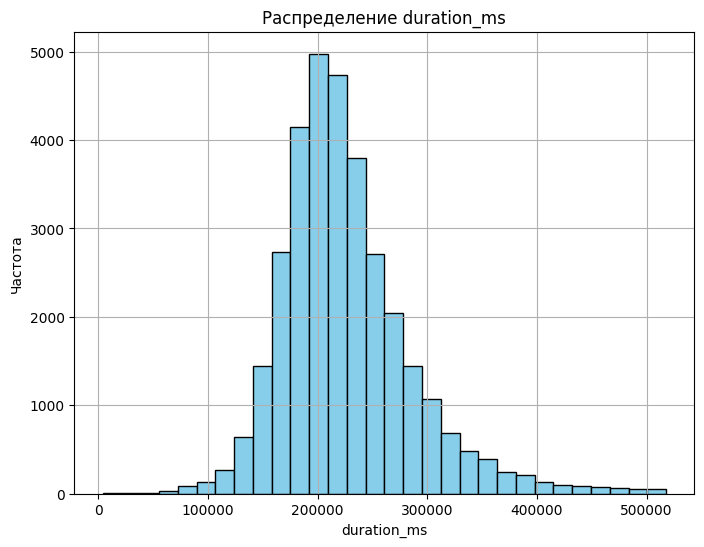

In [47]:
#строим гистограмму duration_ms
plt.figure(figsize=(8, 6))
plt.hist(data['duration_ms'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение duration_ms')
plt.xlabel('duration_ms')
plt.ylabel('Частота')
plt.grid(True)

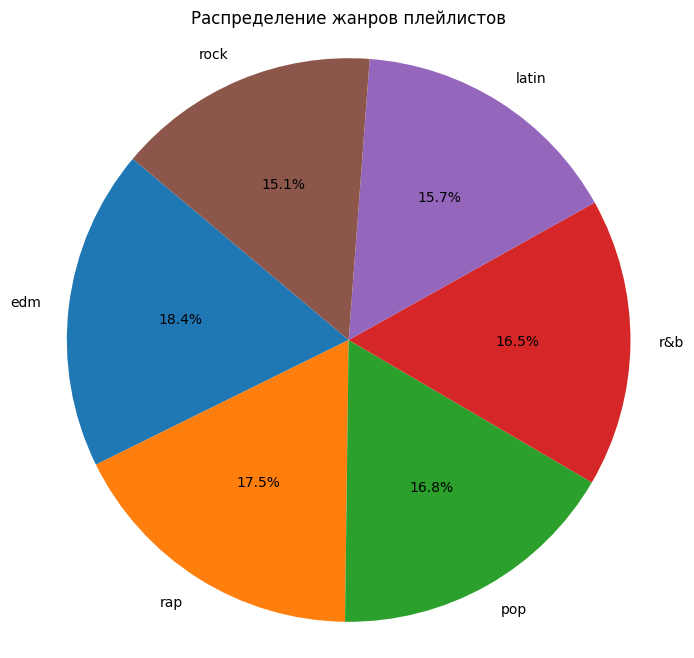

In [48]:
category_counts = data['playlist_genre'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение жанров плейлистов')
plt.axis('equal')
plt.show()

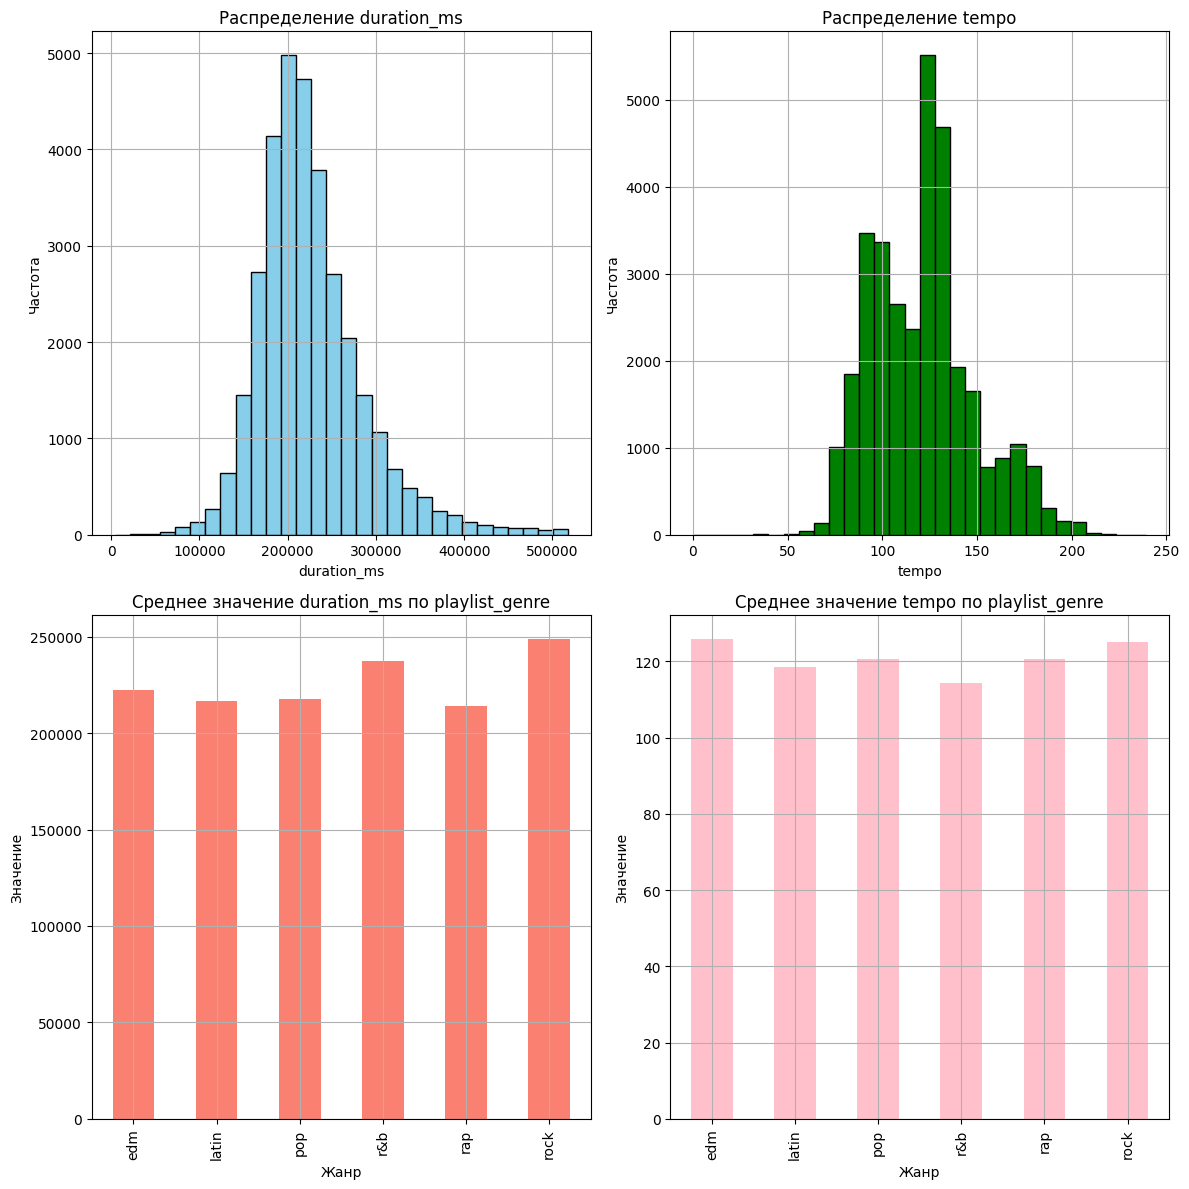

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axes[0, 0].hist(data['duration_ms'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Распределение duration_ms')
axes[0, 0].set_xlabel('duration_ms')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].grid(True)

axes[0, 1].hist(data['tempo'], bins=30, color='green', edgecolor='black')
axes[0, 1].set_title('Распределение tempo')
axes[0, 1].set_xlabel('tempo')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].grid(True)

mean_value_by_category1 = data.groupby('playlist_genre')['duration_ms'].mean()
mean_value_by_category1.plot(kind='bar', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Среднее значение duration_ms по playlist_genre')
axes[1, 0].set_xlabel('Жанр')
axes[1, 0].set_ylabel('Значение')
axes[1, 0].grid(True)

mean_value_by_category2 = data.groupby('playlist_genre')['tempo'].mean()
mean_value_by_category2.plot(kind='bar', ax=axes[1, 1], color='pink')
axes[1, 1].set_title('Среднее значение tempo по playlist_genre')
axes[1, 1].set_xlabel('Жанр')
axes[1, 1].set_ylabel('Значение')
axes[1, 1].grid(True)

plt.tight_layout()

plt.show()

In [80]:
#преобразование колонки даты релиза альбома в datetime
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'], errors='coerce')
data['release_year'] = data['track_album_release_date'].dt.year

#функция для отображения графика
def plot_danceability_by_year(start_year, end_year):
    filtered_data = data[(data['release_year'] >= start_year) & (data['release_year'] <= end_year)]
    year_avg_danceability = filtered_data.groupby('release_year')['danceability'].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(year_avg_danceability.index, year_avg_danceability.values, marker='o', linestyle='-', color='b')
    plt.title(f'Средняя танцевальность треков с {start_year} по {end_year}')
    plt.xlabel('Год')
    plt.ylabel('Средняя Danceability')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#создаем слайдеры
years = sorted(data['release_year'].unique())
start_year_slider = widgets.IntSlider(value=min(years), min=min(years), max=max(years), step=1, description='Start Year:')
end_year_slider = widgets.IntSlider(value=max(years), min=min(years), max=max(years), step=1, description='End Year:')

def update_plot(start_year, end_year):
    if start_year <= end_year:
        plot_danceability_by_year(start_year, end_year)

interact(update_plot, start_year=start_year_slider, end_year=end_year_slider)

interactive(children=(IntSlider(value=1990, description='Start Year:', max=2024, min=1990), IntSlider(value=20…

<function __main__.update_plot(start_year, end_year)>

4. pandas:

Построить три разных вида графиков с использованием pandas.DataFrame.plot / Series.plot.


*   Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).
*   Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

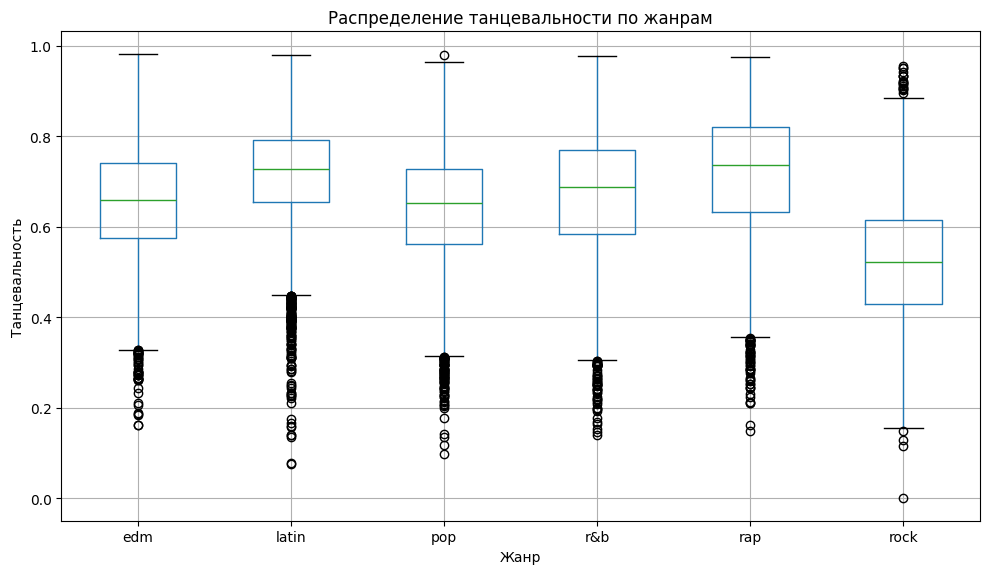

In [50]:
#boxplot с by
data.boxplot(column='danceability', by='playlist_genre', figsize=(10, 6))
plt.title('Распределение танцевальности по жанрам')
plt.suptitle('')
plt.xlabel('Жанр')
plt.ylabel('Танцевальность')
plt.tight_layout()
plt.show()

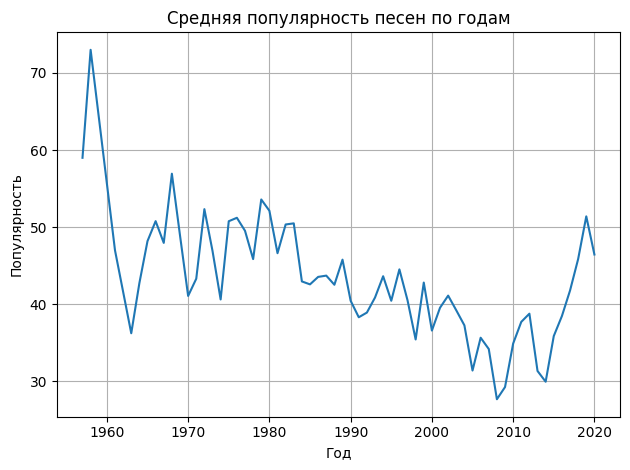

In [52]:
#serias
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'], errors='coerce')
data['release_year'] = data['track_album_release_date'].dt.year
popularity_by_year = data.groupby('release_year')['track_popularity'].mean()
popularity_by_year.plot(kind='line', title='Средняя популярность песен по годам', xlabel='Год', ylabel='Популярность', grid=True)
plt.tight_layout()
plt.show()

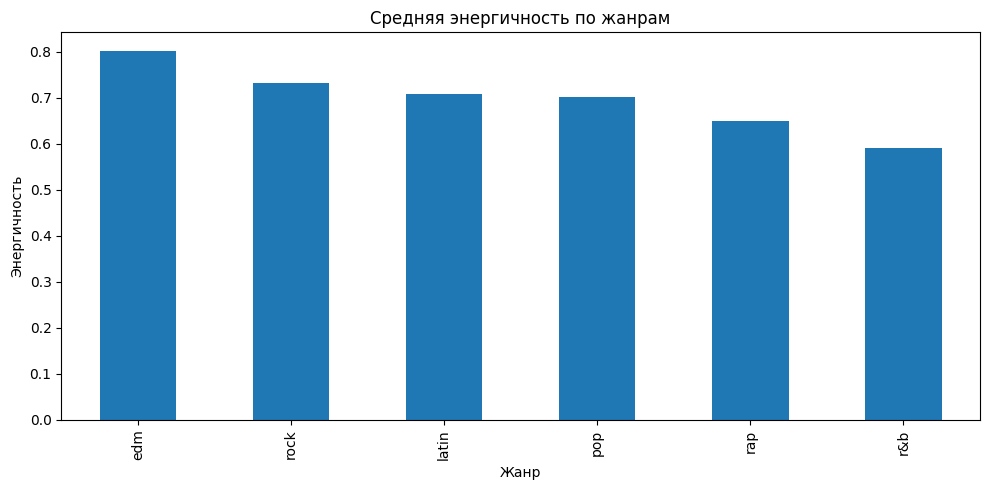

In [53]:
#dataframe
energy_by_genre = data.groupby('playlist_genre')['energy'].mean().sort_values(ascending=False)

energy_by_genre_df = energy_by_genre.to_frame()

energy_by_genre_df.plot(kind='bar', legend=False, title='Средняя энергичность по жанрам', figsize=(10, 5))
plt.xlabel('Жанр')
plt.ylabel('Энергичность')
plt.tight_layout()
plt.show()

5. seaborn:

Построить .pairplot на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.

Построить .jointplot, проанализировать взаимосвязь двух конкретных числовых признаков.

Построить .boxplot и/или .violinplot на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.

Построить график .heatmap попарной корреляции всех числовых признаков.

Категориальные признаки необходимо убрать из датафрейма перед построением.

In [54]:
data_numeric = data.select_dtypes(include='number').dropna() #убираем категориальные признаки

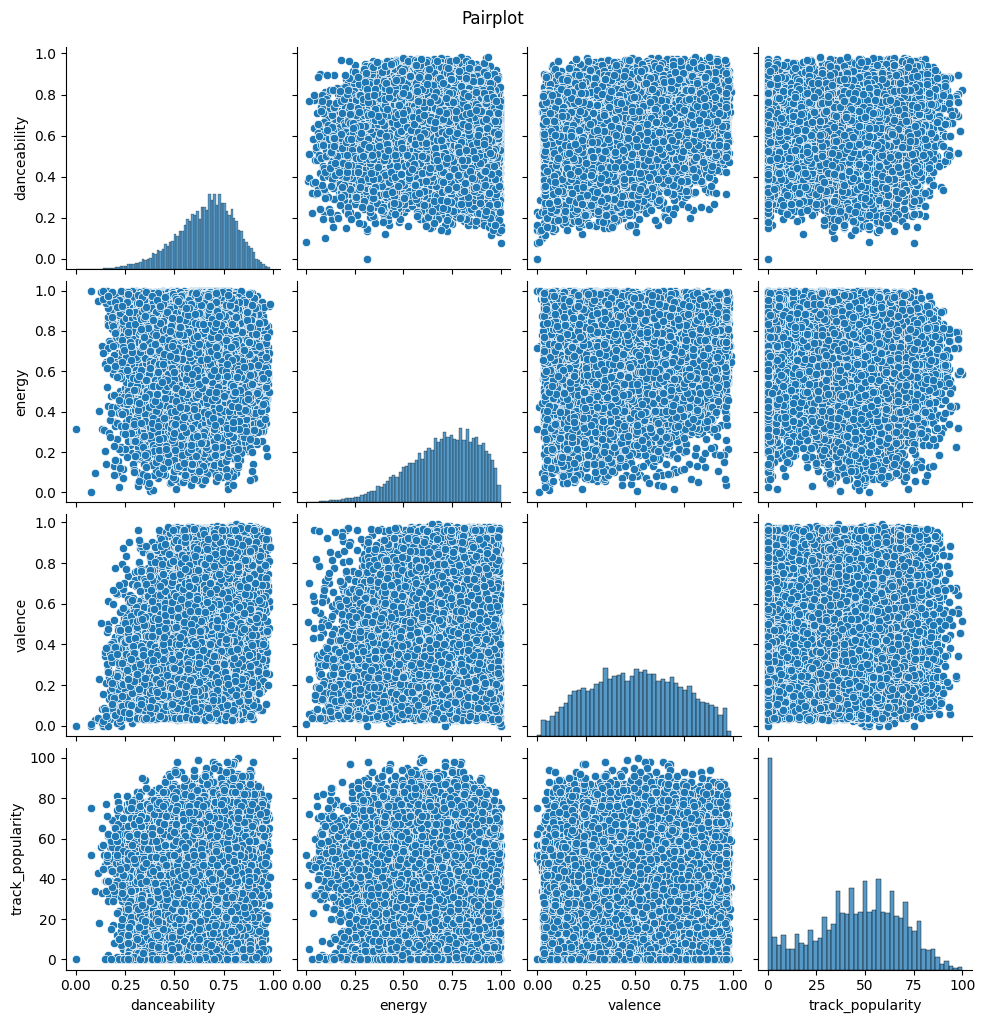

In [55]:
sns.pairplot(data_numeric[['danceability', 'energy', 'valence', 'track_popularity']])
plt.suptitle("Pairplot", y=1.02)
plt.show()

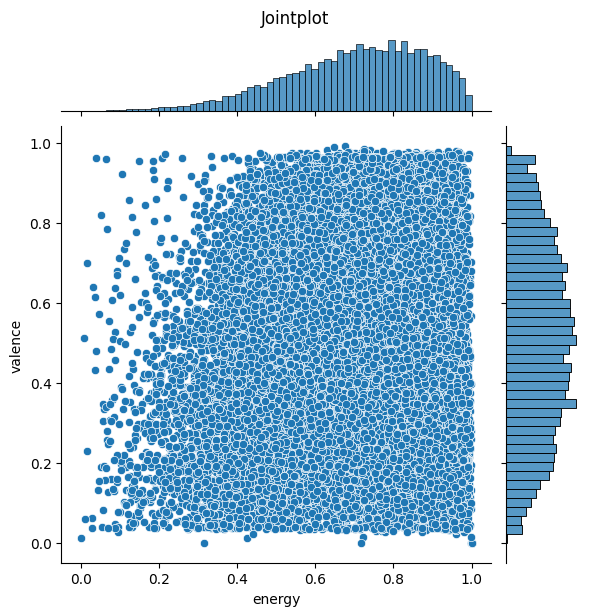

In [56]:
sns.jointplot(data=data_numeric, x='energy', y='valence', kind='scatter')
plt.suptitle("Jointplot", y=1.02)
plt.show()

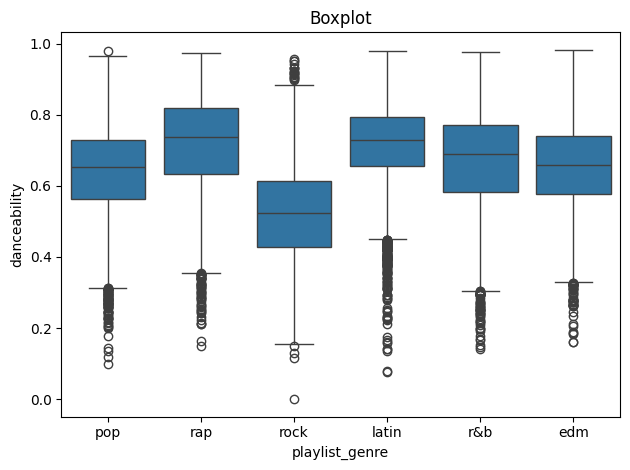

In [57]:
sns.boxplot(data=data, x='playlist_genre', y='danceability')
plt.title("Boxplot")
plt.tight_layout()
plt.show()

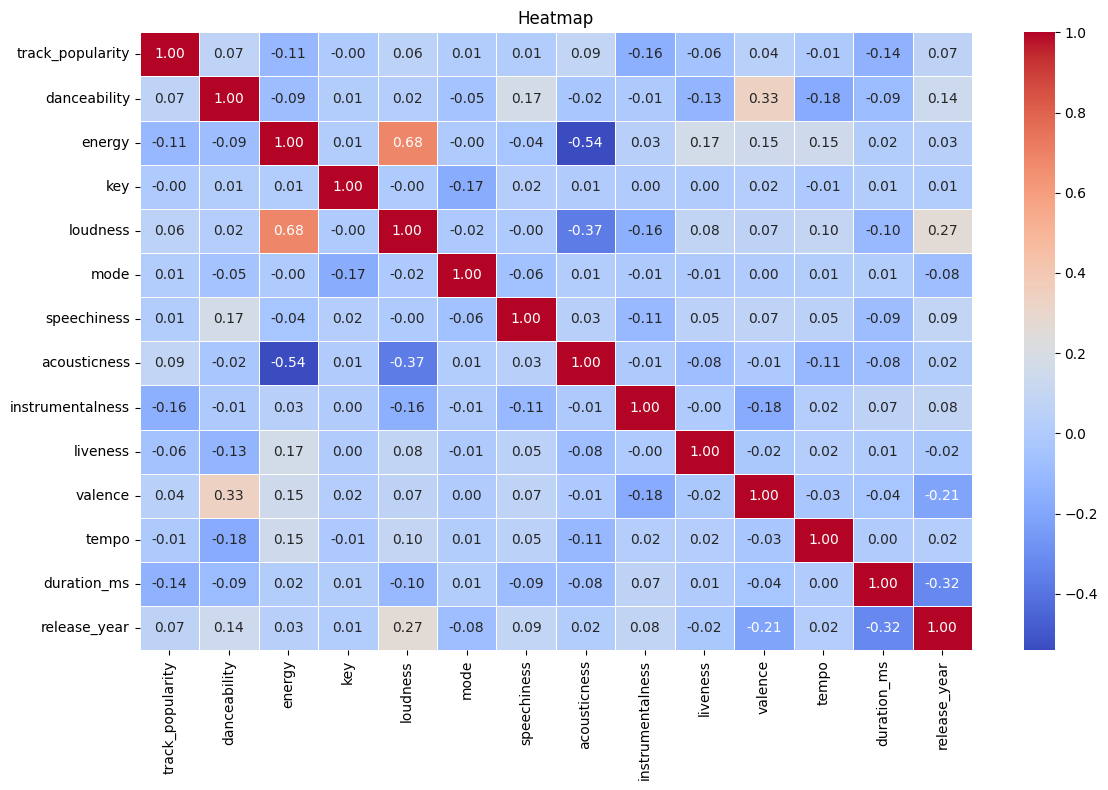

In [58]:
corr_matrix = data_numeric.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap")
plt.tight_layout()
plt.show()

6. scipy.stats:

Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.

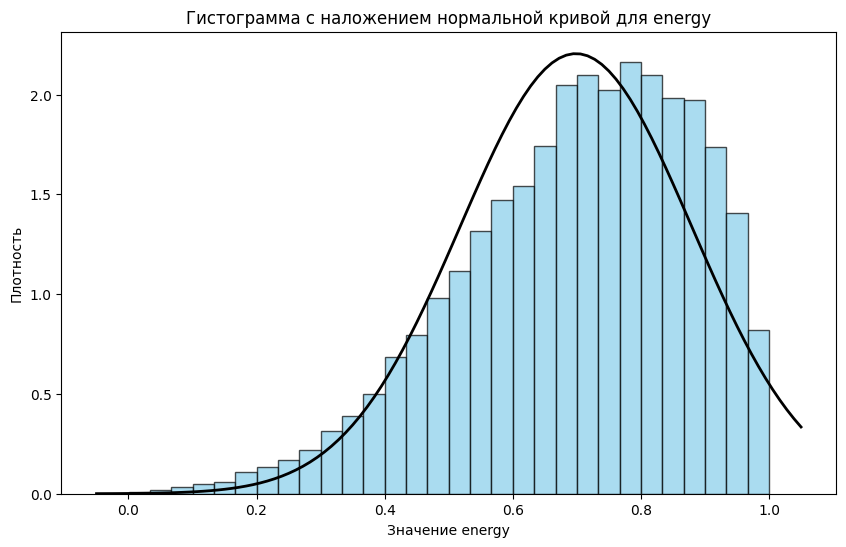

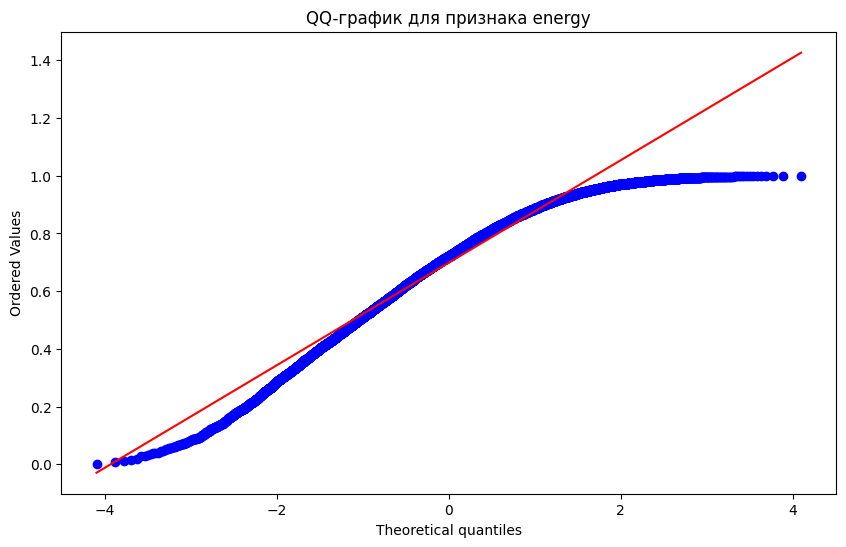

In [59]:
data1 = data['energy'].dropna()

#строим гистограмму
plt.figure(figsize=(10, 6))
plt.hist(data1, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)

#строим нормальную кривую с параметрами из данных
mu, std = norm.fit(data1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Гистограмма с наложением нормальной кривой для energy')
plt.xlabel('Значение energy')
plt.ylabel('Плотность')
plt.show()

#строим QQ-график
plt.figure(figsize=(10, 6))
stats.probplot(data1, dist="norm", plot=plt)
plt.title('QQ-график для признака energy')
plt.show()


7. plotly:

Построить несколько графиков разного вида.

Построить несколько суб-графиков на одном графике.

Построить интерактивный график.

Использование Dash опционально.

In [60]:
#линейный
data_sorted = data.head(1000).sort_values('track_album_release_date')
fig1 = px.line(data_sorted, x='track_album_release_date', y='energy', title='Энергичность по дате релиза')
fig1.show()

In [61]:
#столбчатый
avg_dance = data.groupby('playlist_genre')['danceability'].mean().reset_index()
fig2 = px.bar(avg_dance, x='playlist_genre', y='danceability', title='Средняя танцевальность по жанрам', color='danceability')
fig2.show()

In [62]:
#субграфики
fig3 = make_subplots(rows=1, cols=2, subplot_titles=("Energy по жанрам", "Valence по жанрам"))
avg_vals = data.groupby('playlist_genre')[['energy', 'valence']].mean().reset_index()
fig3.add_trace(go.Bar(x=avg_vals['playlist_genre'], y=avg_vals['energy'], name='Energy'), row=1, col=1)
fig3.add_trace(go.Bar(x=avg_vals['playlist_genre'], y=avg_vals['valence'], name='Valence'), row=1, col=2)

fig3.update_layout(title_text='Energy и Valence по жанрам', height=400)
fig3.show()

In [63]:
#интерактивный
data['year'] = pd.to_datetime(data['track_album_release_date'], errors='coerce').dt.year
yearly_avg = data.groupby('year')[['energy', 'valence']].mean().reset_index()

fig4 = px.line(yearly_avg, x='year', y='energy', title='Средняя energy по годам релиза')
fig4.update_traces(mode='lines+markers')

fig4.update_layout(xaxis=dict(rangeslider=dict(visible=True), type='linear'))
fig4.show()